## Importing Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

## Preprocess

In [2]:
def preprocess(dataset):
    """
    Preprocesses the dataset by handling missing values, encoding categorical variables, and scaling numerical variables.

    Args:
        dataset (str): The path or name of the dataset file.

    Returns:
        pandas.DataFrame: The preprocessed dataset.
    """
    # Load the dataset
    df = pd.read_csv(dataset)

    # Drop the 'id' column if it exists
    if 'id' in df.columns:
        df.drop('id', axis=1, inplace=True)

    # Define categorical and numerical columns
    categorical_columns = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
    numerical_columns = [col for col in df.columns if col not in categorical_columns]

    # Fill missing values: mode for categorical columns, mean for numerical ones
    for col in df.columns:
        if col in categorical_columns:
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)

    # One-hot encode categorical columns
    df = pd.get_dummies(df, columns=categorical_columns).astype(int)

    # Scale numerical columns
    scaler = MinMaxScaler()
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

    # Binarize the 'num' column
    df['num'] = np.where(df['num']>0, 1, 0)
    
    return df


In [3]:
# Preprocess the dataset
df = preprocess('heart_disease_uci.csv')

In [4]:
# Separate the features (X) and the target variable (y)
X = df.drop('num', axis=1).values
y = df['num'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model

In [5]:
# Initialize the Decision Tree model
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

DecisionTreeClassifier()

## Results

In [6]:
# Make predictions on the training and testing data
preds_train = model.predict(X_train)
preds_test = model.predict(X_test)

# Calculate the accuracy of the model on the training and testing data
train_accuracy = accuracy_score(y_train, preds_train) * 100
test_accuracy = accuracy_score(y_test, preds_test) * 100

# Print the accuracy of the model on the training and testing data
print(f"Accuracy of the model on the training data: {train_accuracy:.2f}%")
print(f"Accuracy of the model on the test data: {test_accuracy:.2f}%")

Accuracy of the model on the training data: 100.00%
Accuracy of the model on the test data: 79.35%


## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model with regularization
model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)

# Print cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
preds_test = model.predict(X_test)

# Calculate the accuracy of the model on the test data
test_accuracy = accuracy_score(y_test, preds_test) * 100

# Print the accuracy of the model on the test data
print(f"Accuracy of the model on the test data: {test_accuracy:.2f}%")


## Model with more parameters and Cross validation

In [8]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define the parameter grid with a wider range
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Initialize the Grid Search object with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print(f"Best parameters: {best_params}")

# Train the model using the best parameters
model = RandomForestClassifier(**best_params, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
preds_test = model.predict(X_test)

# Calculate the accuracy of the model on the test data
test_accuracy = accuracy_score(y_test, preds_test) * 100

# Print the accuracy of the model on the test data
print(f"Accuracy of the model on the test data: {test_accuracy:.2f}%")

# Perform cross-validation on the model with the best parameters
scores = cross_val_score(model, X, y, cv=5)

# Print cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")


Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy of the model on the test data: 85.33%
Cross-validation scores: [0.7826087  0.66847826 0.86413043 0.85326087 0.66304348]
Average cross-validation score: 0.7663043478260869


## Visualization

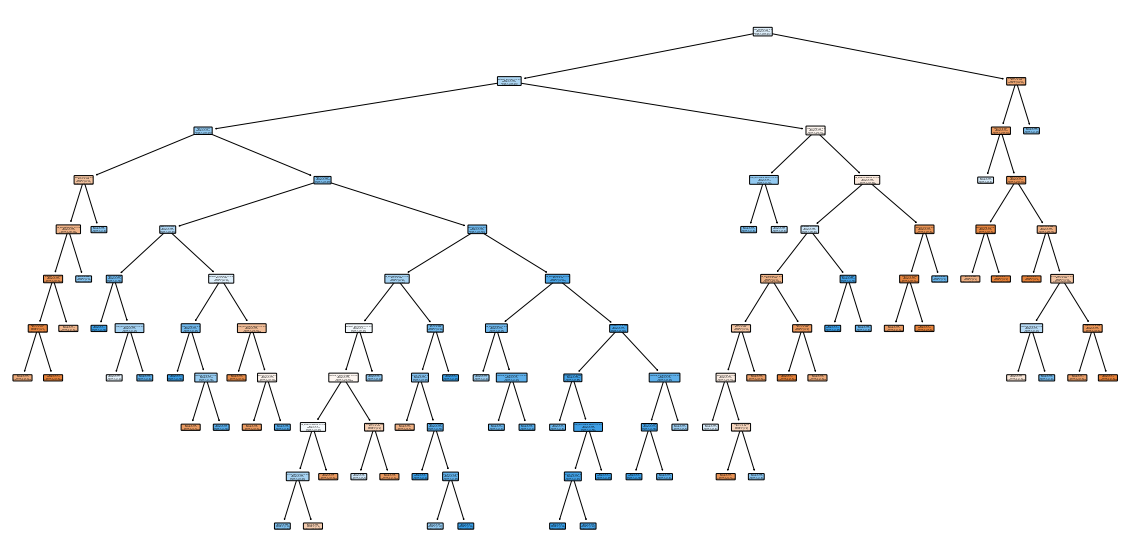

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Fit the model
model = RandomForestClassifier(**best_params, random_state=42)
model.fit(X_train, y_train)

# Get one of the trees from the random forest
estimator = model.estimators_[0]

# Set figure parameters
plt.figure(figsize=(20,10))

# Plot the tree
plot_tree(estimator, 
          filled=True, 
          rounded=True, 
          class_names=['No Disease', 'Disease'], 
          feature_names=df.drop('num', axis=1).columns)

plt.show()

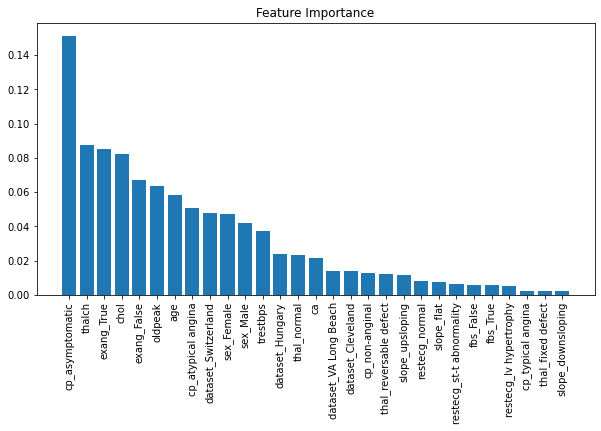

In [10]:
importances = model.feature_importances_
feature_names = df.drop('num', axis=1).columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]

# Create plot
plt.figure(figsize=(10,5))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()